<a href="https://colab.research.google.com/github/19PA1A0495/cv-ip-31-/blob/main/cv_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [4]:
train_dir = "/content/drive/MyDrive/CVDataset/casting_data/casting_data/train"
test_dir = "/content/drive/MyDrive/CVDataset/casting_data/casting_data/test"

In [17]:
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(300,300),batch_size=32,class_mode = "binary",shuffle=True)
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(300,300),batch_size=32,class_mode = "binary",shuffle=False)

Found 6647 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
creating the model

In [24]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(300,300,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))


In [26]:
model.compile(loss='hinge', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit_generator(training_set,steps_per_epoch=50,epochs=10,validation_data=test_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 586s 12s/step - loss: 0.9244 - accuracy: 0.5763 - val_loss: 1.0959 - val_accuracy: 0.5483
Epoch 2/10
50/50 [==============================] - 295s 6s/step - loss: 0.8493 - accuracy: 0.5806 - val_loss: 0.8193 - val_accuracy: 0.7399
Epoch 3/10
50/50 [==============================] - 242s 5s/step - loss: 0.7921 - accuracy: 0.6431 - val_loss: 0.5917 - val_accuracy: 0.7105
Epoch 4/10
50/50 [==============================] - 181s 4s/step - loss: 0.6431 - accuracy: 0.7113 - val_loss: 0.4621 - val_accuracy: 0.7804
Epoch 5/10
50/50 [==============================] - 154s 3s/step - loss: 0.5380 - accuracy: 0.7475 - val_loss: 0.4417 - val_accuracy: 0.8699
Epoch 6/10
50/50 [==============================] - 125s 2s/step - loss: 0.3634 - accuracy: 0.8338 - val_loss: 0.4486 - val_accuracy: 0.8615
Epoch 7/10
50/50 [==============================] - 118s 2s/step - loss: 0.4302 - accuracy: 0.8087 - val_loss: 0.6792 - val_accuracy: 0.7776
Epoch 8/10
5

In [32]:
batch_size = 10

Accuracy and loss

In [50]:
test_score = model.evaluate_generator(test_set, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 92.81%
[INFO] Loss:  0.335618793964386


Train Accuracy vs Validation Accuracy

Text(0.5, 1.0, 'Accuracy Curves')

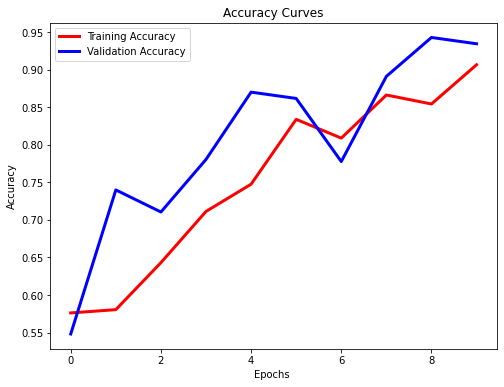

In [36]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

Confusion matrix

In [37]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
target_names = []
for key in training_set.class_indices:
    target_names.append(key)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


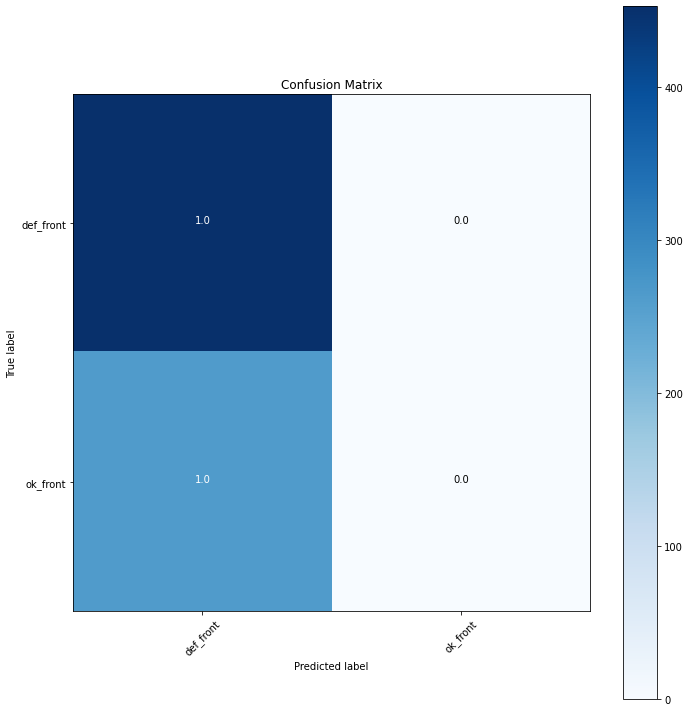

In [49]:
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               5607552   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                